# DATA EXTRACTION, CLEANING

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Importing pandas, numpy, matplotlib

In [4]:
df = pd.read_csv("Sub_Division_IMD_2017.csv")
df.head() #Data provided by the Government of India

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,AVG_ANNUAL_RAINFALL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [5]:
df_average = df.groupby('SUBDIVISION').mean()
df_average.head()
# Average of the above data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,AVG_ANNUAL_RAINFALL,JF,MAM,JJAS,OND
SUBDIVISION,,,,,,,,,,,,,,,,,,
Andaman & Nicobar Islands,1959.946429,54.382143,27.685714,31.594545,71.916364,354.829730,470.083636,399.047273,398.613636,440.382569,289.989091,233.018182,157.466972,2926.373585,82.067857,459.419266,1703.708257,678.759633
Arunachal Pradesh,1966.848485,46.716327,90.883673,153.972165,265.387879,356.693939,641.817347,691.165306,491.307071,432.005051,194.793814,35.149485,24.079381,3403.959140,137.602041,777.810309,2258.214433,253.648958
Assam & Meghalaya,1959.000000,16.860684,31.363248,79.221368,205.102564,340.849573,508.741880,494.565812,403.389744,310.693162,152.497436,26.892308,8.955556,2579.133333,48.220513,625.179487,1717.388889,188.353846
Bihar,1959.000000,13.242735,14.152991,10.194017,16.848718,53.573504,173.158974,325.188889,298.740171,217.835043,62.944444,7.055556,3.631624,1196.563248,27.392308,80.618803,1014.923932,73.638462
Chhattisgarh,1959.000000,14.023932,18.966667,15.245299,16.530769,20.989744,197.859829,398.082906,388.828205,218.102564,63.780342,11.572650,5.158974,1369.136752,32.988034,52.768376,1202.876923,80.505983


In [6]:
df_annual_rainfall = df_average.iloc[:,[-5]]
df_annual_rainfall.head()
# Selected only Average Rainfall from the above table
# This is a new dataframe --->   df_annual_rainfall

,AVG_ANNUAL_RAINFALL
SUBDIVISION,
Andaman & Nicobar Islands,2926.373585
Arunachal Pradesh,3403.959140
Assam & Meghalaya,2579.133333
Bihar,1196.563248
Chhattisgarh,1369.136752


In [7]:
regional_probabilities = [13,5,1,8,8,10,5,8,17,10,1,21,17,16,20,4,8,7,10,7,14,9,8,4,17,17,24,7,5,9,13,13,12,10,25,8]
# List of Regional drought probabilities for above subdivisions (FROM INDIAN METEREOLOGICAL DEPARTMENT REPORT)

In [8]:
coordinates = [[11.7401,92.6586],[28.2180,94.7278],[25.4670,91.3662],[25.0961,85.3131],[21.2787,81.8661],[15.9129,79.7400],
            [12.9141,74.8560],[24.5362,81.3037],[26.9124,75.7873],[26.7606,83.3732],[23.3322,86.3616],[22.7739,71.6673],
            [28.9931,77.0151],[31.1048,77.1734],[33.7782,76.5762],[23.6102,85.2799],[10.8505,76.2711],[15.2993,74.1240],
           [10.57,72.64],[19.8762,75.3433],[18.2070,76.1784],[24.6637,93.9063],[16.8302,75.7100],[20.9517,85.0985],
            [31.1471,75.3412],[14.4673,78.8242],[21.8467,70.8120],[12.9716,77.5946],[27.5330,88.5122],[11.1271,78.6569],
           [18.1124,79.0193],[30.0668,79.0193],[21.1286,79.0964],[23.3315,75.0367],[24.8829,74.6230],[28.5904,78.5718]]
# List of coordinates of above subdivisions

In [9]:
df_annual_rainfall["Probabilities"] = regional_probabilities
df_annual_rainfall["Location"] = coordinates
# Making the above lists (regional_probabilities and coordinates) as columns in df_annual_rainfall data frame

C:\Users\Pavan Mohan\Anaconda3\New Folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pavan Mohan\Anaconda3\New Folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
df_annual_rainfall.head()  
#df_annual_rainfall data frame after adding lists as columns 

,AVG_ANNUAL_RAINFALL,Probabilities,Location
SUBDIVISION,,,
Andaman & Nicobar Islands,2926.373585,13,"[11.7401, 92.6586]"
Arunachal Pradesh,3403.959140,5,"[28.218, 94.7278]"
Assam & Meghalaya,2579.133333,1,"[25.467, 91.3662]"
Bihar,1196.563248,8,"[25.0961, 85.3131]"
Chhattisgarh,1369.136752,8,"[21.2787, 81.8661]"


In [11]:
conditions = [
    (df_annual_rainfall["Probabilities"]>20),
    (df_annual_rainfall["Probabilities"]>9),
    (df_annual_rainfall["Probabilities"]<10)
]
# Assigning another column that categorises subdivisions into Severe, moderate, least drought

In [12]:
values = ["SEVERE_DROUGHT","MODERATE_DROUGHT","LEAST_DROUGHT"]

In [13]:
df_annual_rainfall["METEOROLOGICAL_DROUGHT_CATEGORIES"] = np.select(conditions,values)

C:\Users\Pavan Mohan\Anaconda3\New Folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_annual_rainfall
# Complete dataframe after adding all the columns

,AVG_ANNUAL_RAINFALL,Probabilities,Location,METEOROLOGICAL_DROUGHT_CATEGORIES
SUBDIVISION,,,,
Andaman & Nicobar Islands,2926.373585,13,"[11.7401, 92.6586]",MODERATE_DROUGHT
Arunachal Pradesh,3403.959140,5,"[28.218, 94.7278]",LEAST_DROUGHT
Assam & Meghalaya,2579.133333,1,"[25.467, 91.3662]",LEAST_DROUGHT
Bihar,1196.563248,8,"[25.0961, 85.3131]",LEAST_DROUGHT
Chhattisgarh,1369.136752,8,"[21.2787, 81.8661]",LEAST_DROUGHT
Coastal Andhra Pradesh,1050.304274,10,"[15.9129, 79.74]",MODERATE_DROUGHT
Coastal Karnataka,3397.637931,5,"[12.9141, 74.856]",LEAST_DROUGHT
East Madhya Pradesh,1203.035043,8,"[24.5362, 81.3037]",LEAST_DROUGHT
East Rajasthan,656.501709,17,"[26.9124, 75.7873]",MODERATE_DROUGHT


In [15]:
x = df_annual_rainfall.iloc[:,[0,1]]
x.reset_index(drop=True, inplace=True)
x.head()

,AVG_ANNUAL_RAINFALL,Probabilities
0,2926.373585,13
1,3403.959140,5
2,2579.133333,1
3,1196.563248,8
4,1369.136752,8


In [16]:
METEOROLOGICAL_DROUGHT_CATEGORIES = df_annual_rainfall["METEOROLOGICAL_DROUGHT_CATEGORIES"].tolist()

In [17]:
mydata = pd.get_dummies(df_annual_rainfall,columns=["METEOROLOGICAL_DROUGHT_CATEGORIES"]) 

In [18]:
mydata.head()

,AVG_ANNUAL_RAINFALL,Probabilities,Location,METEOROLOGICAL_DROUGHT_CATEGORIES_LEAST_DROUGHT,METEOROLOGICAL_DROUGHT_CATEGORIES_MODERATE_DROUGHT,METEOROLOGICAL_DROUGHT_CATEGORIES_SEVERE_DROUGHT
SUBDIVISION,,,,,,
Andaman & Nicobar Islands,2926.373585,13,"[11.7401, 92.6586]",0,1,0
Arunachal Pradesh,3403.959140,5,"[28.218, 94.7278]",1,0,0
Assam & Meghalaya,2579.133333,1,"[25.467, 91.3662]",1,0,0
Bihar,1196.563248,8,"[25.0961, 85.3131]",1,0,0
Chhattisgarh,1369.136752,8,"[21.2787, 81.8661]",1,0,0


In [19]:
mydata0 = mydata[mydata["METEOROLOGICAL_DROUGHT_CATEGORIES_LEAST_DROUGHT"]== 1]
mydata0.head()

,AVG_ANNUAL_RAINFALL,Probabilities,Location,METEOROLOGICAL_DROUGHT_CATEGORIES_LEAST_DROUGHT,METEOROLOGICAL_DROUGHT_CATEGORIES_MODERATE_DROUGHT,METEOROLOGICAL_DROUGHT_CATEGORIES_SEVERE_DROUGHT
SUBDIVISION,,,,,,
Arunachal Pradesh,3403.959140,5,"[28.218, 94.7278]",1,0,0
Assam & Meghalaya,2579.133333,1,"[25.467, 91.3662]",1,0,0
Bihar,1196.563248,8,"[25.0961, 85.3131]",1,0,0
Chhattisgarh,1369.136752,8,"[21.2787, 81.8661]",1,0,0
Coastal Karnataka,3397.637931,5,"[12.9141, 74.856]",1,0,0


In [20]:
mydata1 = mydata[mydata["METEOROLOGICAL_DROUGHT_CATEGORIES_MODERATE_DROUGHT"]== 1]
mydata1.head()

,AVG_ANNUAL_RAINFALL,Probabilities,Location,METEOROLOGICAL_DROUGHT_CATEGORIES_LEAST_DROUGHT,METEOROLOGICAL_DROUGHT_CATEGORIES_MODERATE_DROUGHT,METEOROLOGICAL_DROUGHT_CATEGORIES_SEVERE_DROUGHT
SUBDIVISION,,,,,,
Andaman & Nicobar Islands,2926.373585,13,"[11.7401, 92.6586]",0,1,0
Coastal Andhra Pradesh,1050.304274,10,"[15.9129, 79.74]",0,1,0
East Rajasthan,656.501709,17,"[26.9124, 75.7873]",0,1,0
East Uttar Pradesh,975.864957,10,"[26.7606, 83.3732]",0,1,0
Haryana Delhi & Chandigarh,528.439316,17,"[28.9931, 77.0151]",0,1,0


In [21]:
mydata2 = mydata[mydata["METEOROLOGICAL_DROUGHT_CATEGORIES_SEVERE_DROUGHT"]== 1]
mydata2.head()

,AVG_ANNUAL_RAINFALL,Probabilities,Location,METEOROLOGICAL_DROUGHT_CATEGORIES_LEAST_DROUGHT,METEOROLOGICAL_DROUGHT_CATEGORIES_MODERATE_DROUGHT,METEOROLOGICAL_DROUGHT_CATEGORIES_SEVERE_DROUGHT
SUBDIVISION,,,,,,
Gujarat Region,917.827350,21,"[22.7739, 71.6673]",0,0,1
Saurashtra & Kutch,496.398291,24,"[21.8467, 70.812]",0,0,1
West Rajasthan,294.125641,25,"[24.8829, 74.623]",0,0,1


# GRAPH 

<Figure size 7200x14400 with 0 Axes>

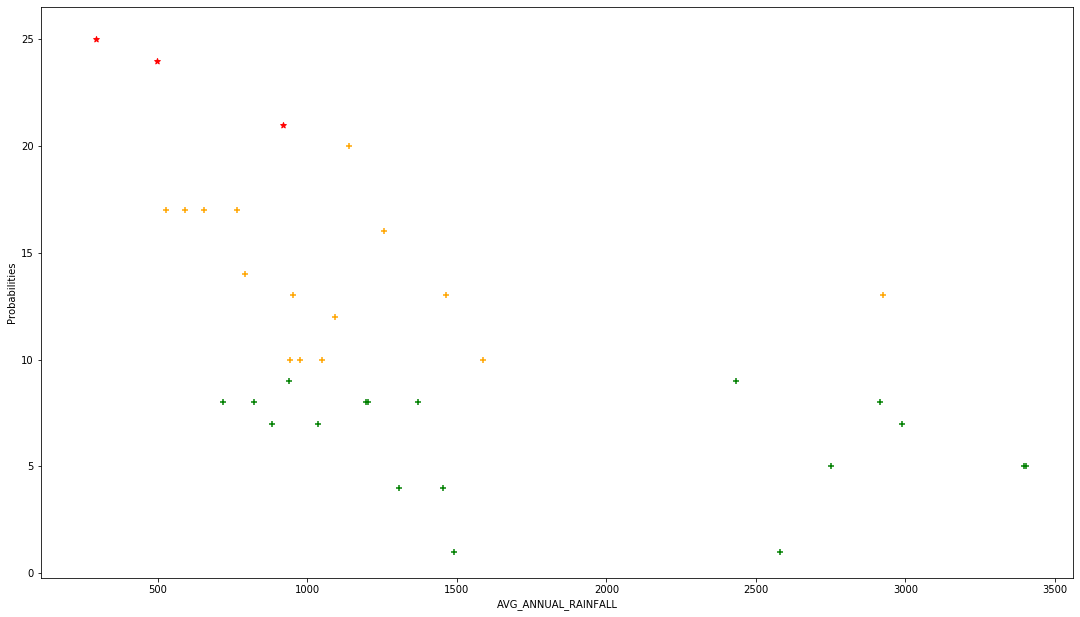

<Figure size 7200x14400 with 0 Axes>

In [49]:
plt.scatter(mydata0["AVG_ANNUAL_RAINFALL"], mydata0["Probabilities"],color="green",marker='+')
plt.scatter(mydata1["AVG_ANNUAL_RAINFALL"], mydata1["Probabilities"],color="orange",marker='+')
plt.scatter(mydata2["AVG_ANNUAL_RAINFALL"], mydata2["Probabilities"],color="red",marker='*')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plt.xlabel("AVG_ANNUAL_RAINFALL")
plt.ylabel("Probabilities")
plt.figure(figsize=(100,200))

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df_annual_rainfall.iloc[:,0:2]

In [25]:
X.head()

,AVG_ANNUAL_RAINFALL,Probabilities
SUBDIVISION,,
Andaman & Nicobar Islands,2926.373585,13
Arunachal Pradesh,3403.959140,5
Assam & Meghalaya,2579.133333,1
Bihar,1196.563248,8
Chhattisgarh,1369.136752,8


In [26]:
y = df_annual_rainfall.iloc[:,3]

In [27]:
y.head()

SUBDIVISION
Andaman & Nicobar Islands    MODERATE_DROUGHT
Arunachal Pradesh               LEAST_DROUGHT
Assam & Meghalaya               LEAST_DROUGHT
Bihar                           LEAST_DROUGHT
Chhattisgarh                    LEAST_DROUGHT
Name: METEOROLOGICAL_DROUGHT_CATEGORIES, dtype: object

# Machine Learning Process

In [28]:
features = ["AVG_ANNUAL_RAINFALL","Probabilities"]
target = ["METEOROLOGICAL_DROUGHT_CATEGORIES"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [30]:
from sklearn.svm import SVC
model = SVC(kernel='poly',C=10,gamma=100)
model.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
model.score(X_test,y_test)

0.8181818181818182

In [32]:
SUBDIVISIONS_X_test = X_test.index.values.tolist()

In [33]:
SUBDIVISIONS_X_test

['Andaman & Nicobar Islands',
 'Madhya Maharashtra',
 'Vidarbha',
 'West Uttar Pradesh',
 'East Madhya Pradesh',
 'Haryana Delhi & Chandigarh',
 'Tamil Nadu',
 'West Madhya Pradesh',
 'Coastal Andhra Pradesh',
 'Arunachal Pradesh',
 'Lakshadweep']

In [34]:
y_test

SUBDIVISION
Andaman & Nicobar Islands     MODERATE_DROUGHT
Madhya Maharashtra               LEAST_DROUGHT
Vidarbha                      MODERATE_DROUGHT
West Uttar Pradesh               LEAST_DROUGHT
East Madhya Pradesh              LEAST_DROUGHT
Haryana Delhi & Chandigarh    MODERATE_DROUGHT
Tamil Nadu                       LEAST_DROUGHT
West Madhya Pradesh           MODERATE_DROUGHT
Coastal Andhra Pradesh        MODERATE_DROUGHT
Arunachal Pradesh                LEAST_DROUGHT
Lakshadweep                   MODERATE_DROUGHT
Name: METEOROLOGICAL_DROUGHT_CATEGORIES, dtype: object

In [35]:
import folium

In [36]:
from branca.element import Figure
fig=Figure(width=550,height=350)

In [37]:
SUBDIVISIONS = df_annual_rainfall.index.values.tolist()

In [38]:
fig3=Figure(width=550,height=350)
m3=folium.Map(location=[28.644800, 77.216721])
folium.TileLayer('Stamen Terrain').add_to(m3)
folium.TileLayer('Stamen Toner').add_to(m3)
folium.TileLayer('Stamen Water Color').add_to(m3)
folium.TileLayer('cartodbpositron').add_to(m3)
folium.TileLayer('cartodbdark_matter').add_to(m3)
folium.LayerControl().add_to(m3)

In [39]:
for i in df_annual_rainfall.Location:
    a = coordinates.index(i)
    folium.Marker(location= i,popup= SUBDIVISIONS[a]).add_to(m3)

In [40]:
for i in df_annual_rainfall.Location:
    a = coordinates.index(i)
    if  METEOROLOGICAL_DROUGHT_CATEGORIES[a] == "SEVERE_DROUGHT" :
        folium.Marker(location= i,popup= SUBDIVISIONS[a],icon=folium.Icon(color='red',icon='none')).add_to(m3)
    elif METEOROLOGICAL_DROUGHT_CATEGORIES[a] == "MODERATE_DROUGHT":
         folium.Marker(location= i,popup= SUBDIVISIONS[a],icon=folium.Icon(color='orange',icon='none')).add_to(m3)
    else:
         folium.Marker(location= i,popup= SUBDIVISIONS[a],icon=folium.Icon(color='green',icon='none')).add_to(m3)

# MAP SHOWING TRAINING DATA
RED - SEVERE DROUGHT
ORANGE - MODERATE DROUGHT
GREEN - LESS DROUGHT

In [41]:
m3

In [42]:
fig2=Figure(width=550,height=350)
m2=folium.Map(location=[28.644800, 77.216721])
folium.TileLayer('Stamen Terrain').add_to(m2)
folium.TileLayer('Stamen Toner').add_to(m2)
folium.TileLayer('Stamen Water Color').add_to(m2)
folium.TileLayer('cartodbpositron').add_to(m2)
folium.TileLayer('cartodbdark_matter').add_to(m2)
folium.LayerControl().add_to(m2)

In [43]:
for l in SUBDIVISIONS_X_test:
    if l in SUBDIVISIONS:
        i = SUBDIVISIONS.index(l)   # Index value of subdivision in subdivision list
        a = coordinates[i]      # Location of that subdivision
        if  METEOROLOGICAL_DROUGHT_CATEGORIES[i] == "SEVERE_DROUGHT" :
                folium.Marker(location= a,popup=l,icon=folium.Icon(color='red',icon='none')).add_to(m2)
        elif METEOROLOGICAL_DROUGHT_CATEGORIES[i] == "MODERATE_DROUGHT":
            folium.Marker(location= a,popup= l,icon=folium.Icon(color='orange',icon='none')).add_to(m2)
        else:
            folium.Marker(location= a,popup= l,icon=folium.Icon(color='green',icon='none')).add_to(m2)

# MAP WITH ONLY PREDICTION OF X_TEST

In [44]:
m2

In [45]:
fig8=Figure(width=550,height=350)
m8=folium.Map(location=[28.644800, 77.216721])
folium.TileLayer('Stamen Terrain').add_to(m8)
folium.TileLayer('Stamen Toner').add_to(m8)
folium.TileLayer('Stamen Water Color').add_to(m8)
folium.TileLayer('cartodbpositron').add_to(m8)
folium.TileLayer('cartodbdark_matter').add_to(m8)
folium.LayerControl().add_to(m8)

In [46]:
for l in SUBDIVISIONS:
    if l in SUBDIVISIONS_X_test:
        i = SUBDIVISIONS.index(l)   # Index value of subdivision in subdivision list
        a = coordinates[i]      # Location of that subdivision
        if  METEOROLOGICAL_DROUGHT_CATEGORIES[i] == "SEVERE_DROUGHT" :
                folium.Marker(location= a,popup=l,icon=folium.Icon(color='red',icon='none')).add_to(m8)
        elif METEOROLOGICAL_DROUGHT_CATEGORIES[i] == "MODERATE_DROUGHT" :
            folium.Marker(location= a,popup= l,icon=folium.Icon(color='orange',icon='none')).add_to(m8)
        else:
            folium.Marker(location= a,popup= l,icon=folium.Icon(color='green',icon='none')).add_to(m8)
    else:
        j = SUBDIVISIONS.index(l)
        if  METEOROLOGICAL_DROUGHT_CATEGORIES[j] == "SEVERE_DROUGHT" :
            folium.Marker(location= coordinates[j],popup=l,icon=folium.Icon(color='red',prefix='fa',icon='anchor')).add_to(m8)
        elif METEOROLOGICAL_DROUGHT_CATEGORIES[i] == "MODERATE_DROUGHT" :
             folium.Marker(location= coordinates[j],popup=l,icon=folium.Icon(color='orange',prefix='fa',icon='anchor')).add_to(m8)
        else:
            folium.Marker(location= coordinates[j],popup=l,icon=folium.Icon(color='green',prefix='fa',icon='anchor')).add_to(m8)

# MAP SHOWING BOTH TRAIN AND TEST SET
ANCHOR SYMBOL - TRAINING SET 

EMPTY BUBBLE - TEST SET

In [47]:
m8